# Uber Fare Analysis
> I used a dataset of Uber ride information for my project, which I analysed by building visuals with matplotlib and making predictions from the data.


train.csv - Input features and target fare_amount values for the training set. test.csv - Input features for the test set. Goal is to predict fare_amount for each row.

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [49]:
train_df=pd.read_csv(r"train.csv",nrows=200)
test_df=pd.read_csv(r"test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(200, 9)
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [50]:
train_df = train_df.drop('Unnamed: 0', axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                200 non-null    object 
 1   fare_amount        200 non-null    float64
 2   pickup_datetime    200 non-null    object 
 3   pickup_longitude   200 non-null    float64
 4   pickup_latitude    200 non-null    float64
 5   dropoff_longitude  200 non-null    float64
 6   dropoff_latitude   200 non-null    float64
 7   passenger_count    200 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [51]:
# check for null values
null_mask = train_df.isnull()

# get the sum of null values in each column
null_count = null_mask.sum()

# print the null counts
print(null_count)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


#here we can see there are 8columns in which 6 numerics and 2 are object.
#Lets change the type of pickup_datetime from object to DateTime

In [52]:
# Reframing the columns

train_df = train_df[(train_df.pickup_latitude<90) & (train_df.dropoff_latitude<90) &
        (train_df.pickup_latitude>-90) & (train_df.dropoff_latitude>-90) &
        (train_df.pickup_longitude<180) & (train_df.dropoff_longitude<180) &
        (train_df.pickup_longitude>-180) & (train_df.dropoff_longitude>-180)]

In [53]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])
# display the first few rows of the updated DataFrame
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


#On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [54]:
# From pickup_datetime extract date, month, year, weekday and dayname
from datetime import datetime

train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['date'] = train_df['pickup_datetime'].dt.date
train_df['month'] = train_df['pickup_datetime'].dt.month
train_df['year'] = train_df['pickup_datetime'].dt.year
train_df['day_of_the_week'] = train_df['pickup_datetime'].dt.weekday
train_df['day_name'] = train_df['pickup_datetime'].dt.day_name()
train_df['pickup_time'] = train_df['pickup_datetime'].dt.time
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour
train_df['Day Part']= pd.cut(train_df['pickup_hour'],bins=[-1,4,12,17,21,23],labels=['Night','Morning','Afternoon','Evening','Night'],ordered=False)


In [55]:
display(train_df.head())

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day_of_the_week,day_name,pickup_time,pickup_hour,Day Part
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,5,2015,3,Thursday,19:52:06,19,Evening
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,7,2009,4,Friday,20:04:56,20,Evening
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,8,2009,0,Monday,21:45:00,21,Evening
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,6,2009,4,Friday,08:22:21,8,Morning
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,8,2014,3,Thursday,17:47:00,17,Afternoon


#As this is Taxi fare data and we know there are many factors which affect the price of taxi like
Travelled distance

Time of Travel

Demand and Availability of Taxi

Some special places are more costlier like Airport or other places where there might be toll

In [56]:
# The statisitics of our data
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,day_of_the_week,pickup_hour
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.620050,-71.388553,39.327046,-71.387016,39.328778,1.760000,5.555000,2011.710000,2.925000,13.320000
std,8.023976,13.629815,7.508297,13.629487,7.508674,1.342165,3.295646,2.031387,1.812679,6.761374
min,2.500000,-74.015122,0.000000,-74.016152,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992744,40.736897,-73.989370,40.734994,1.000000,3.000000,2010.000000,1.000000,9.000000
50%,8.100000,-73.982225,40.753583,-73.979274,40.754108,1.000000,5.000000,2011.500000,3.000000,14.000000
75%,12.125000,-73.968338,40.766672,-73.962785,40.770287,2.000000,8.250000,2013.250000,4.000000,19.000000
max,56.800000,0.001782,40.850558,0.000875,40.893366,6.000000,12.000000,2015.000000,6.000000,23.000000


#Exploratory Analysis of Dataset

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Categorical Features

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '6')])

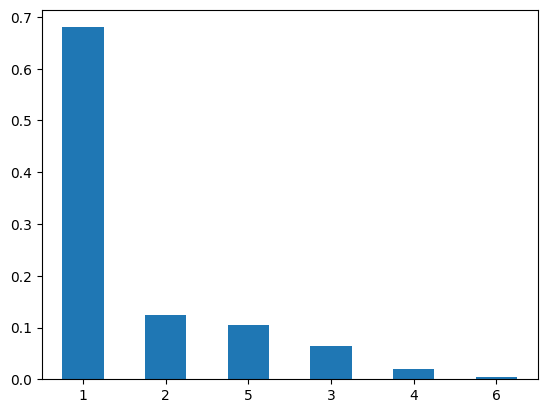

In [58]:
#Passenger Count
train_df['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

#Observation:

Almost 70% of trips had only 1 passanger

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '1'),
  Text(3, 0, '3'),
  Text(4, 0, '5'),
  Text(5, 0, '0'),
  Text(6, 0, '6')])

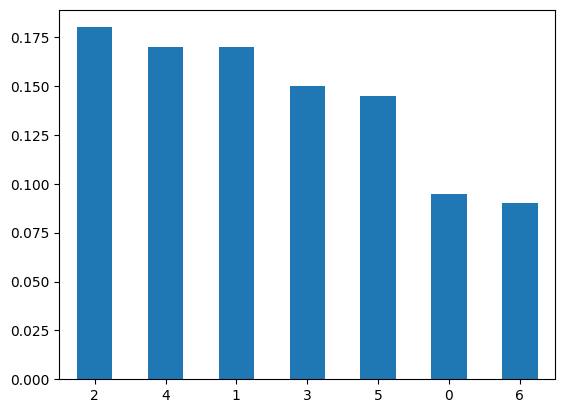

In [59]:
#Day of the week
train_df['day_of_the_week'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

#Observation:

As expected, Friday (weekend eve) and Saturday had the highest number of trips

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '20'),
  Text(1, 0, '14'),
  Text(2, 0, '19'),
  Text(3, 0, '18'),
  Text(4, 0, '9'),
  Text(5, 0, '17'),
  Text(6, 0, '22'),
  Text(7, 0, '21'),
  Text(8, 0, '1'),
  Text(9, 0, '15'),
  Text(10, 0, '13'),
  Text(11, 0, '0'),
  Text(12, 0, '10'),
  Text(13, 0, '11'),
  Text(14, 0, '2'),
  Text(15, 0, '12'),
  Text(16, 0, '16'),
  Text(17, 0, '8'),
  Text(18, 0, '6'),
  Text(19, 0, '23'),
  Text(20, 0, '5'),
  Text(21, 0, '3'),
  Text(22, 0, '7'),
  Text(23, 0, '4')])

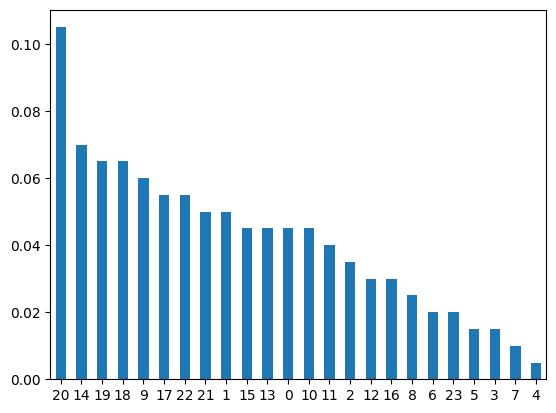

In [60]:
#Pickup Time
train_df['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

#Observation:

As expected, the number of trips are low during 1am - 5am, and peak between 7pm - 9pm

We can clearly see that during weekdays, peak hours are during the day while on weekends, peak hours are late in the night

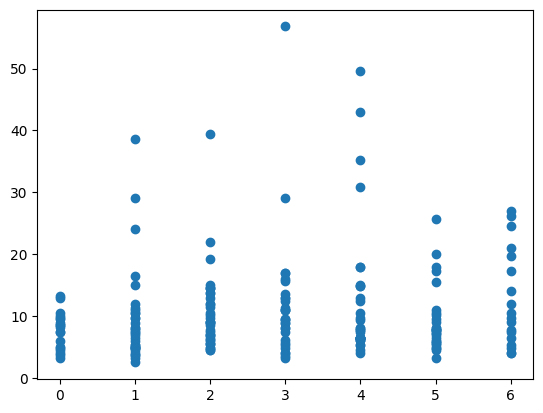

In [61]:
#Scatter plot of day of the week vs fare amount
plt.scatter(x = train_df.day_of_the_week, y = train_df.fare_amount)

# Show the plot
plt.show()

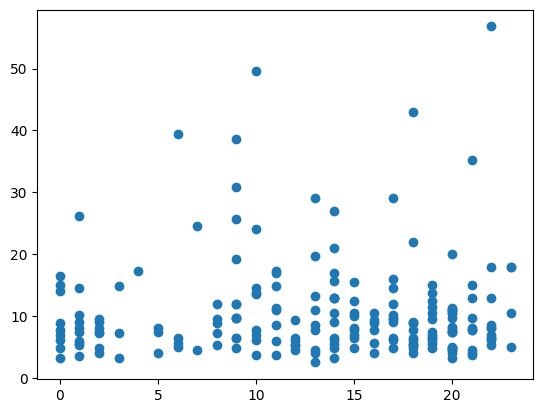

In [62]:
#Scatter plot of pickup time vs fare amount
plt.scatter(x = train_df.pickup_hour, y = train_df.fare_amount)

# Show the plot
plt.show()

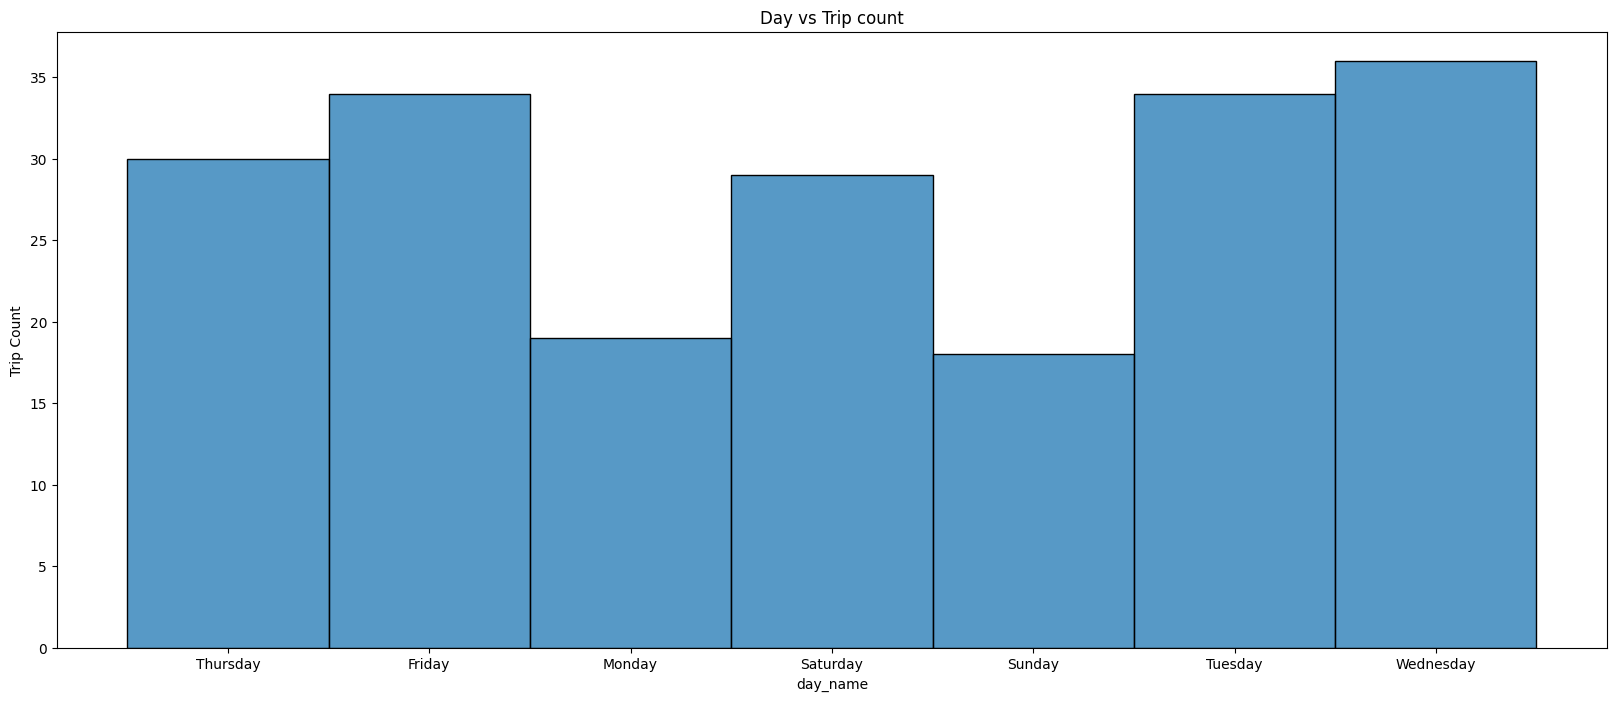

In [63]:
#study how much fare for each day in different parts of day 
plt.figure(figsize=(20,8))
sns.histplot(train_df['day_name'])
plt.ylabel('Trip Count')
plt.title('Day vs Trip count')
plt.show()

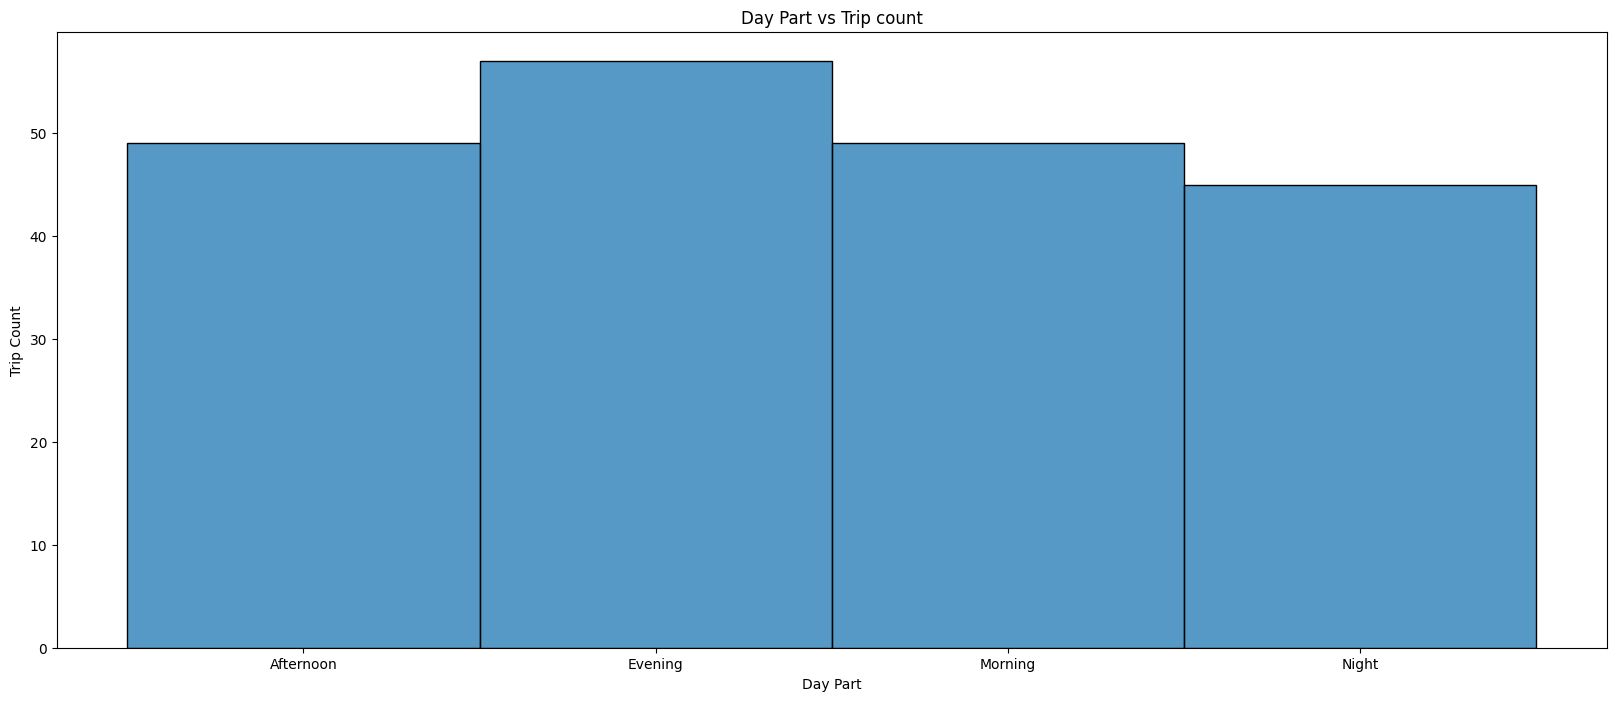

In [66]:
#study how much fare for each day in different parts of day 
plt.figure(figsize=(20,8))
sns.histplot(train_df['Day Part'])
plt.ylabel('Trip Count')
plt.title('Day Part vs Trip count')
plt.show()

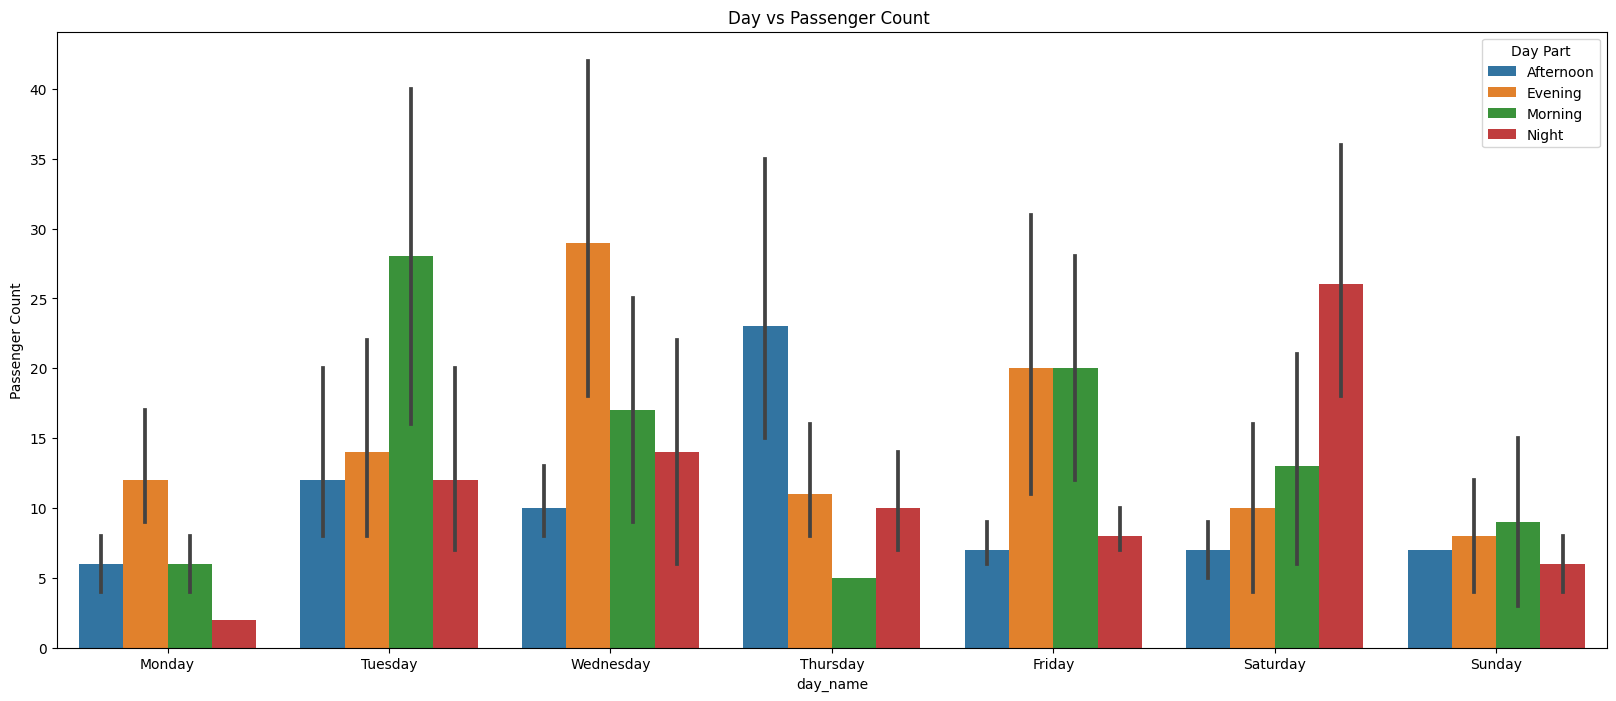

In [67]:
#study how much passenger (in mean) for each day in different parts of day 
plt.figure(figsize=(20,8))
sns.barplot(x=train_df['day_name'],y=train_df['passenger_count'],hue=train_df['Day Part'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],estimator=sum)
plt.ylabel('Passenger Count')
plt.title('Day vs Passenger Count ')
plt.show()

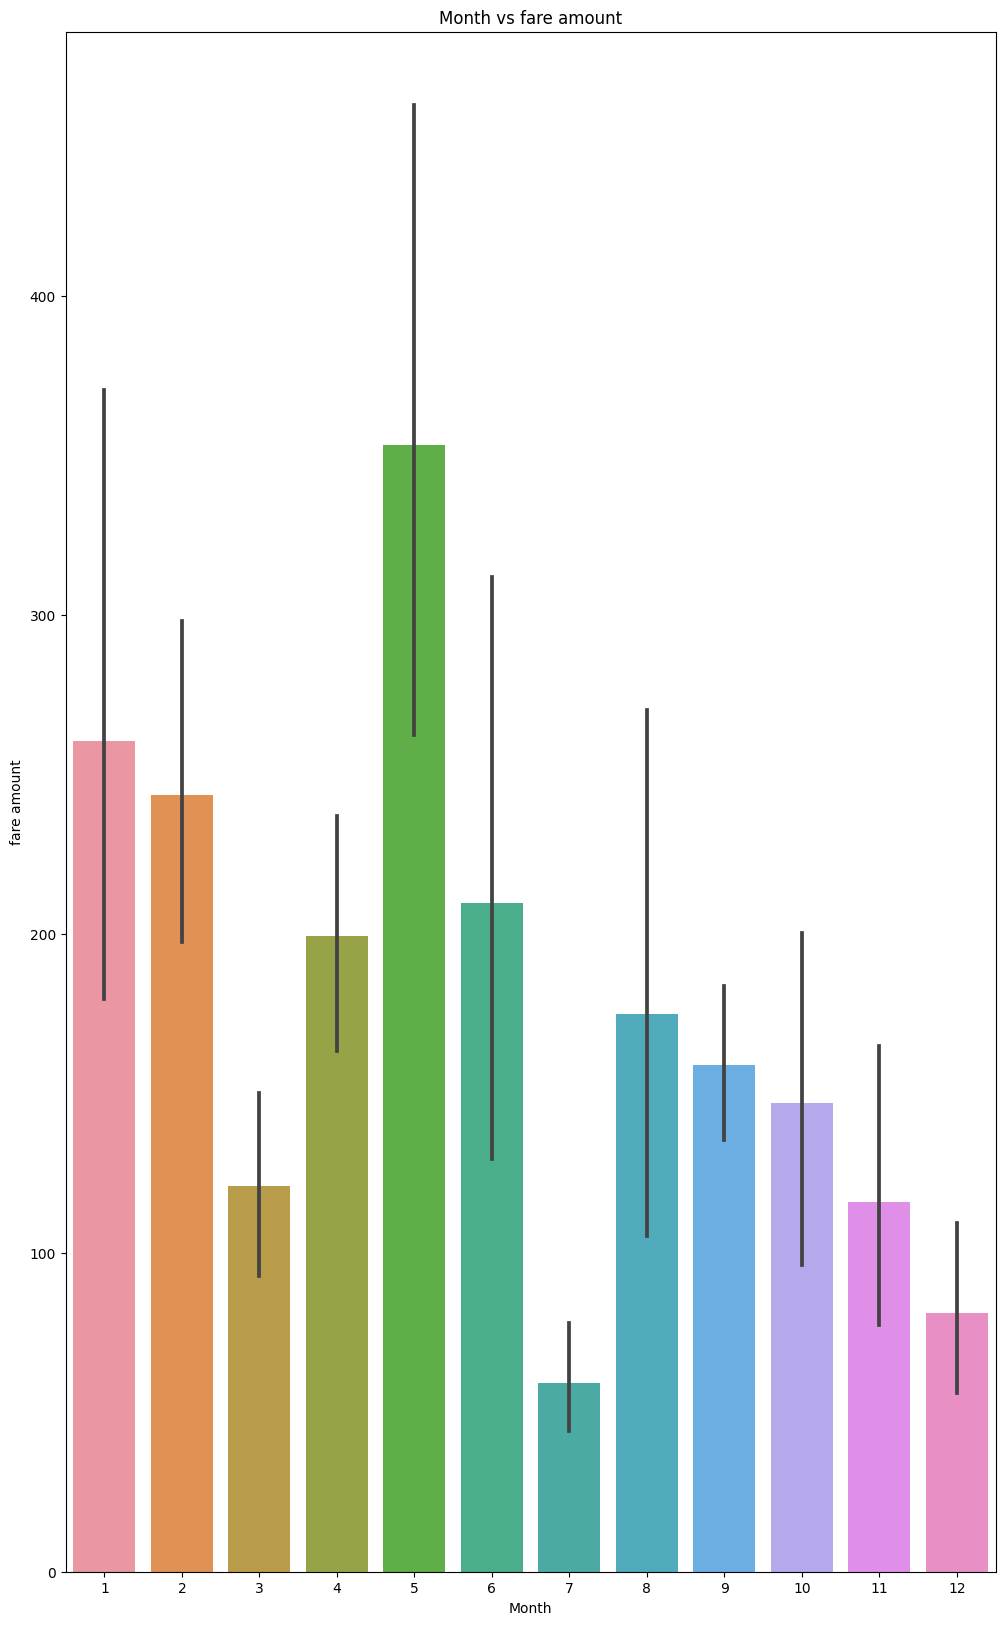

In [68]:
#month wise study 
plt.figure(figsize=(12,20))
plt.title('Month vs fare amount')
sns.barplot(x=train_df['month'],y=train_df['fare_amount'],estimator=sum)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

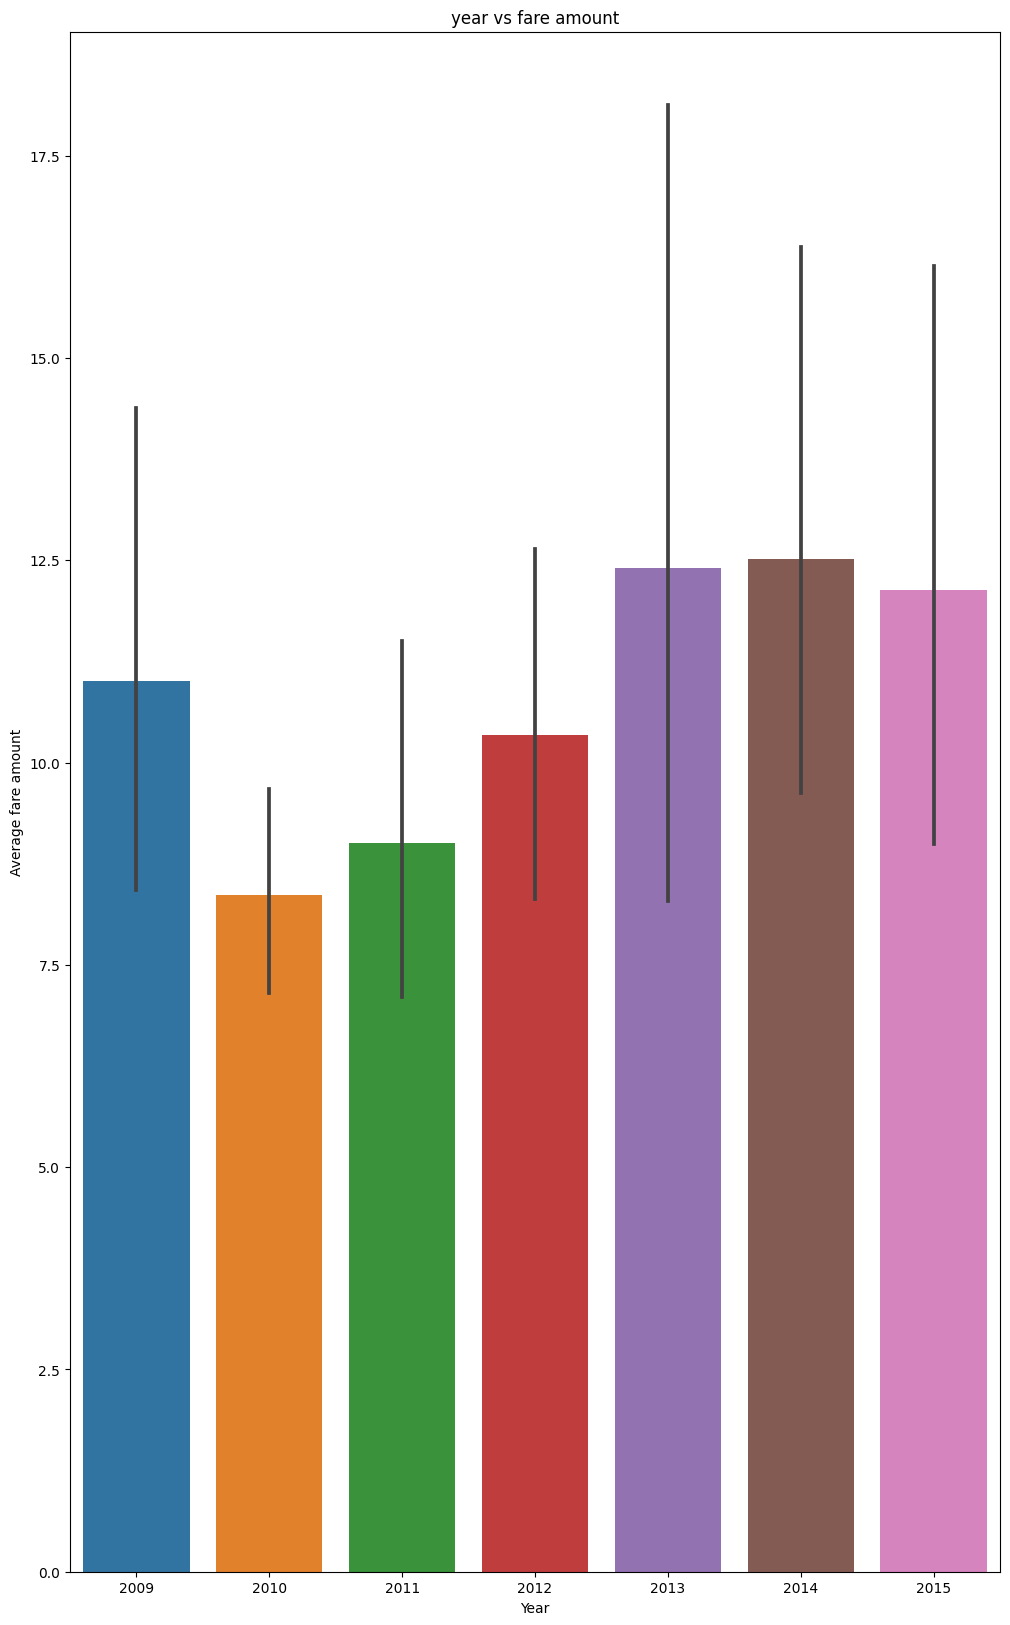

In [69]:
#year wise study 
plt.figure(figsize=(12,20))
plt.title('year vs fare amount')
sns.barplot(x=train_df['year'],y=train_df['fare_amount'])
plt.xlabel('Year')
plt.ylabel('Average fare amount')
plt.show()

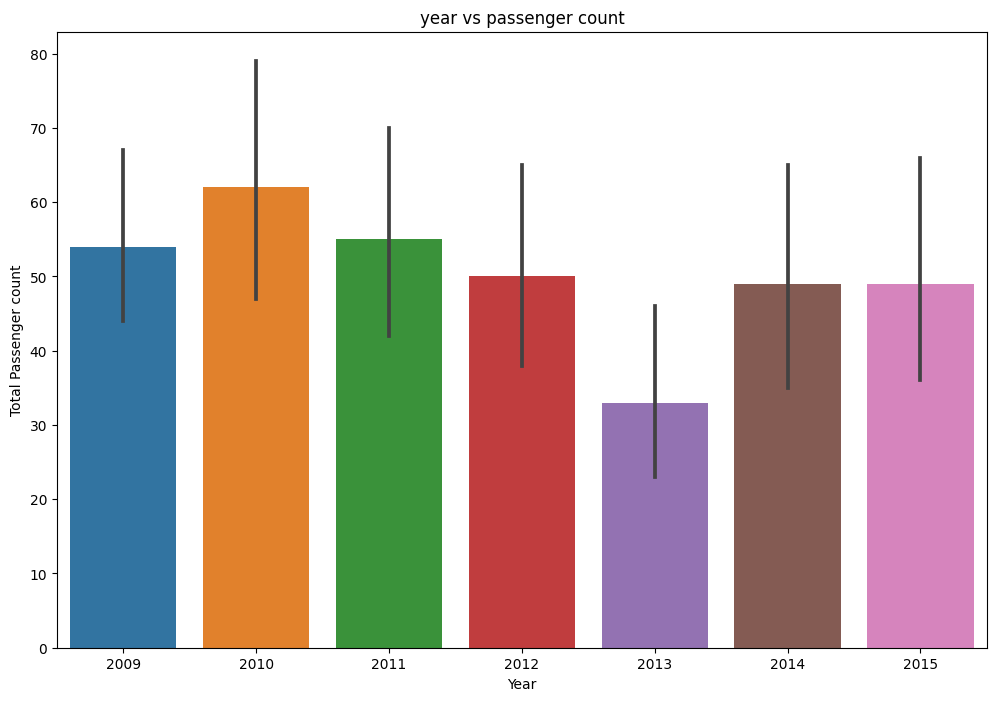

In [70]:
#year wise study 
plt.figure(figsize=(12,8))
plt.title('year vs passenger count')
sns.barplot(x=train_df['year'],y=train_df['passenger_count'],estimator=sum)
plt.xlabel('Year')
plt.ylabel('Total Passenger count')
plt.show()

In [71]:
#lets look min and max value in test dataset of latitude and longitude
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


#we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values

In [72]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [73]:
#lets drop all the values which are not coming in above boundary, as those are noisy data
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (200, 16)
after droping (193, 16)


In [74]:
#lets remove all those rows where fare amount is negative
print("before droping", train_df.shape)
train_df=train_df[train_df['fare_amount']>0]
print("after droping", train_df.shape)

before droping (193, 16)
after droping (193, 16)


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                193 non-null    object             
 1   fare_amount        193 non-null    float64            
 2   pickup_datetime    193 non-null    datetime64[ns, UTC]
 3   pickup_longitude   193 non-null    float64            
 4   pickup_latitude    193 non-null    float64            
 5   dropoff_longitude  193 non-null    float64            
 6   dropoff_latitude   193 non-null    float64            
 7   passenger_count    193 non-null    int64              
 8   date               193 non-null    object             
 9   month              193 non-null    int64              
 10  year               193 non-null    int64              
 11  day_of_the_week    193 non-null    int64              
 12  day_name           193 non-null    object         

In [76]:
# we will keep only those rows where number of passangers are less than or equal to 8
train_df=train_df[train_df['passenger_count']<=8]

In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                193 non-null    object             
 1   fare_amount        193 non-null    float64            
 2   pickup_datetime    193 non-null    datetime64[ns, UTC]
 3   pickup_longitude   193 non-null    float64            
 4   pickup_latitude    193 non-null    float64            
 5   dropoff_longitude  193 non-null    float64            
 6   dropoff_latitude   193 non-null    float64            
 7   passenger_count    193 non-null    int64              
 8   date               193 non-null    object             
 9   month              193 non-null    int64              
 10  year               193 non-null    int64              
 11  day_of_the_week    193 non-null    int64              
 12  day_name           193 non-null    object         

In [78]:
#here key column and pickup_datetime columns are not needed as we have already created variables extracted from it
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)
train_df.drop(['date'], axis=1, inplace=True)
train_df.drop(['Day Part'], axis=1, inplace=True)
train_df.drop(['pickup_time'], axis=1, inplace=True)

In [79]:
# Convert categorical features to numerical using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['day_name'], prefix=['day'])

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        193 non-null    float64
 1   pickup_longitude   193 non-null    float64
 2   pickup_latitude    193 non-null    float64
 3   dropoff_longitude  193 non-null    float64
 4   dropoff_latitude   193 non-null    float64
 5   passenger_count    193 non-null    int64  
 6   month              193 non-null    int64  
 7   year               193 non-null    int64  
 8   day_of_the_week    193 non-null    int64  
 9   pickup_hour        193 non-null    int64  
 10  day_Friday         193 non-null    uint8  
 11  day_Monday         193 non-null    uint8  
 12  day_Saturday       193 non-null    uint8  
 13  day_Sunday         193 non-null    uint8  
 14  day_Thursday       193 non-null    uint8  
 15  day_Tuesday        193 non-null    uint8  
 16  day_Wednesday      193 non

In [81]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,day_of_the_week,pickup_hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,2015,3,19,0,0,0,0,1,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,2009,4,20,1,0,0,0,0,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,2009,0,21,0,1,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,2009,4,8,1,0,0,0,0,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,2014,3,17,0,0,0,0,1,0,0


#lets divide the data set into train and validation test set

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x=train_df.drop("fare_amount", axis=1)

In [84]:
y=train_df['fare_amount']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [86]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,day_of_the_week,pickup_hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
184,-73.969955,40.789177,-73.946167,40.777729,5,2,2015,2,19,0,0,0,0,0,0,1
68,-73.997650,40.736221,-73.981812,40.761349,2,2,2015,0,11,0,1,0,0,0,0,0
44,-73.982371,40.765501,-73.985248,40.762808,1,7,2012,3,0,0,0,0,0,1,0,0
4,-73.925023,40.744085,-73.973082,40.761247,5,8,2014,3,17,0,0,0,0,1,0,0
17,-74.005665,40.741138,-73.977830,40.749338,2,3,2011,5,23,0,0,1,0,0,0,0


In [87]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,day_of_the_week,pickup_hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
50,-73.983052,40.776055,-73.974093,40.763797,1,10,2009,5,18,0,0,1,0,0,0,0
167,-73.992667,40.753087,-73.986788,40.761582,5,6,2013,5,7,0,0,1,0,0,0,0
88,-74.008325,40.725947,-73.988232,40.720322,1,1,2010,5,3,0,0,1,0,0,0,0
33,-73.991186,40.741393,-74.009710,40.716455,2,9,2013,1,20,0,0,0,0,0,1,0
117,-73.976022,40.760040,-73.982853,40.745040,1,2,2013,0,15,0,1,0,0,0,0,0


In [88]:
x_train.shape

(154, 16)

In [89]:
x_test.shape

(39, 16)

In [90]:
#Lets run the model.
#As we have to build regression model, lets start with linear regression model
from sklearn.linear_model import LinearRegression

In [91]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [92]:
predictedvalues = lrmodel.predict(x_test)

In [93]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 5.552641060769971


In [94]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [95]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [96]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.712773331201284


#RandomForest Regressor is giving good value, so we can use it as final model